# Project 2 - Dimensionality Reduction

---

In [2]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

### Test Function

For the test notebook, you will report performance in the test set which contains 2880 images of size $300\times 300$, also saved as a ```numpy``` array of size $90000\times 2880$.

In [3]:
import numpy as np

# Loading the Test Data with corrected labels
X_test = np.load('data_test.npy').T
t_test = np.load('t_test.npy')

print(X_test.shape, t_test.shape)

(2880, 90000) (2880,)


Your Notebook should include:

1. Loading trained models from problems 1-4, and apply transformations to the test set.

2. For problems 2 and 4, report on the standard performance measures of classification. Discuss and present your results within the report.

# Assignment

## Reducing the Images' Pixel size
For better computation, reducing the pixel size from 300x300 to 50x50

In [4]:
# Resizing the images from 300x300 pixels to 50x50 for faster computation
import cv2

D = 50
X_test_resized = np.array([cv2.resize(x.reshape(300,300),(D,D)).reshape(D*D) for x in X_test])

## 1. RFE
1. Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators.

Implementing Recursive Feature Elimination (RFE) with Logistic Regression

In [8]:
import joblib
#import warnings
#warnings.filterwarnings('ignore')

# Loading the trained RFE (with Logistic Regression)
rfe_with_lr = joblib.load('RFE_with_LR.pkl')

# Applying the transformations to the dataset
X_test_rfe_transformed = rfe_with_lr.transform(X_test_resized)
print('Shape of the transformed X_test:', X_test_rfe_transformed.shape)

# Evaluating the performance
score = rfe_with_lr.score(X_test_resized, t_test)
print('Accuracy using RFE with Logistic Regression:', score)

Shape of the transformed X_test: (2880, 900)
Accuracy using RFE with Logistic Regression: 0.40381944444444445


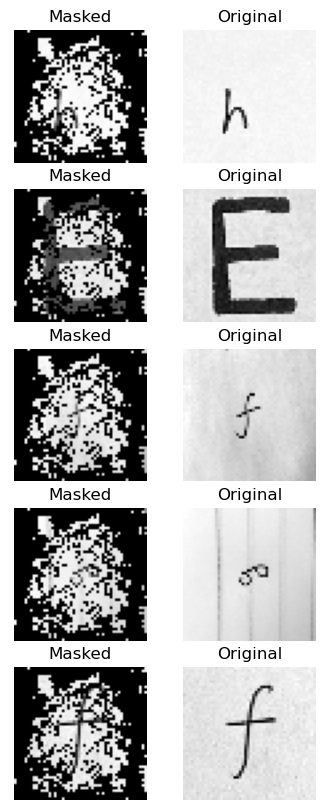

In [11]:
# Masked examples from the test set
import random
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(4,10))
plt.axis('off')

for i in range(5):
  samplei = random.randint(0,len(X_test))
  X_test_masked = (X_test_resized[samplei]*rfe_with_lr.support_).reshape(D,D)

  fig.add_subplot(5,2,2*i+1)
  plt.imshow(X_test_masked, cmap='gray')
  plt.axis('off');plt.title('Masked')

  fig.add_subplot(5,2,2*i+2)
  plt.imshow(X_test_resized[samplei,:].reshape((D,D)),cmap='gray')
  plt.axis('off');plt.title('Original')

plt.show()

Implementing Recursive Feature Elimination (RFE) with Random Forest Classifier

In [14]:
import joblib

# Loading the trained RFE (with Random Forest)
rfe_with_rf = joblib.load('RFE_with_RF.pkl')

# Applying the transformations to the test dataset
X_test_rfe_transformed = rfe_with_rf.transform(X_test_resized)
print('Shape of transformed X_test:', X_test_rfe_transformed.shape)

# Evaluating the performance
score = rfe_with_rf.score(X_test_resized, t_test)
print('Accuracy using RFE with Random Forest:', score)

Shape of transformed X_test: (2880, 900)
Accuracy using RFE with Random Forest: 0.30277777777777776


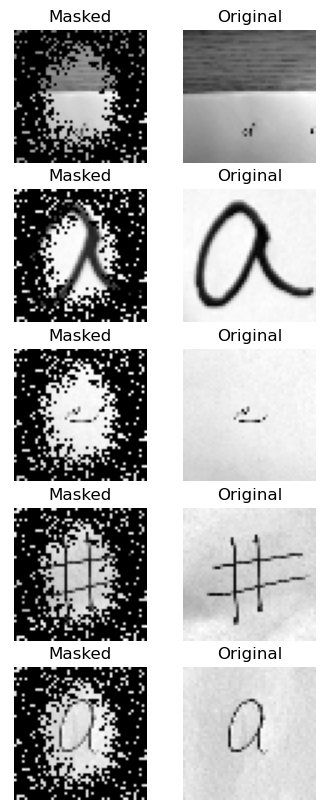

In [16]:
# Masked examples from the test set
import random
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(4,10))
plt.axis('off')

for i in range(5):
  samplei = random.randint(0,len(X_test))
  X_test_masked = (X_test_resized[samplei]*rfe_with_rf.support_).reshape(D,D)

  fig.add_subplot(5,2,2*i+1)
  plt.imshow(X_test_masked, cmap='gray')
  plt.axis('off');plt.title('Masked')

  fig.add_subplot(5,2,2*i+2)
  plt.imshow(X_test_resized[samplei,:].reshape((D,D)),cmap='gray')
  plt.axis('off');plt.title('Original')

plt.show()

## 2. PCA
2. Implement Principal Component Analysis (PCA) to select the number of components that explain at least 90% of the explained variance. Train a classifier on the original dataset and the reduced dataset.
    * Compare performances.

In [18]:
import joblib

# Loading the Trained PCA models
pca = joblib.load('PCA.pkl')
rf = joblib.load('RF_without_PCA.pkl')
rf_pca = joblib.load('RF_with_PCA.pkl')

In [19]:
# Applying the PCA transformations to the test data
X_test_pca_transformed = pca.transform(X_test_resized)
X_test_pca_transformed.shape

(2880, 165)

In [23]:
from sklearn.metrics import classification_report

y_rf = rf.predict(X_test_resized)
print('Performance on the Test set using Random Forest without PCA:')
print(classification_report(t_test, y_rf))

Performance on the Test set using Random Forest without PCA:
              precision    recall  f1-score   support

         0.0       0.39      0.45      0.41       274
         1.0       0.35      0.42      0.38       275
         2.0       0.38      0.67      0.48       282
         3.0       0.46      0.33      0.38       295
         4.0       0.60      0.38      0.46       311
         5.0       0.41      0.36      0.38       296
         6.0       0.46      0.48      0.47       291
         7.0       0.48      0.41      0.44       281
         8.0       0.52      0.51      0.51       288
         9.0       0.63      0.51      0.57       287

    accuracy                           0.45      2880
   macro avg       0.47      0.45      0.45      2880
weighted avg       0.47      0.45      0.45      2880



In [26]:
y_rf_pca = rf_pca.predict(X_test_pca_transformed)
print('Performance on the Test set using Random Forest with PCA:')
print(classification_report(t_test, y_rf_pca))

Performance on the Test set using Random Forest with PCA:
              precision    recall  f1-score   support

         0.0       0.53      0.52      0.53       274
         1.0       0.47      0.53      0.50       275
         2.0       0.49      0.70      0.58       282
         3.0       0.66      0.52      0.58       295
         4.0       0.68      0.50      0.58       311
         5.0       0.56      0.47      0.51       296
         6.0       0.50      0.63      0.56       291
         7.0       0.47      0.52      0.49       281
         8.0       0.56      0.56      0.56       288
         9.0       0.72      0.55      0.62       287

    accuracy                           0.55      2880
   macro avg       0.56      0.55      0.55      2880
weighted avg       0.57      0.55      0.55      2880



---

## 3. LDA and t-SNE

3. Use Fisher's Linear Discriminant Analysis (LDA) and t-SNE to reduce the dataset to 2-dimensions and visualize it.
    * Visualize the dataset, be sure to color-code each point to its corresponding target label.
    * Visualize and compare the 2-dimensional projections with PCA.

Using Fisher's Linear Discriminant Analysis (LDA)

In [27]:
import joblib

# Loading the Trained LDA model
lda_2D = joblib.load('LDA_for_2D.pkl')

In [29]:
# Applying the LDA transformation
X_test_lda = lda_2D.transform(X_test_resized)

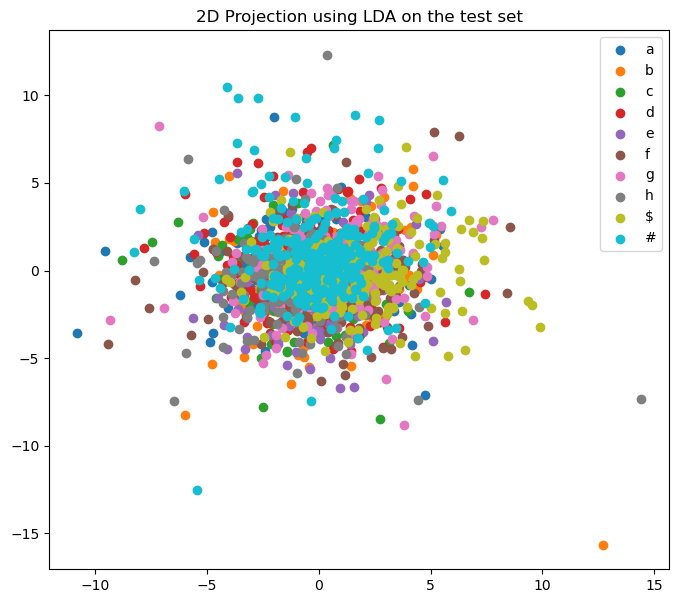

In [30]:
import matplotlib.pyplot as plt

# Visualizing the test set in 2D projection with LDA
plt.figure(figsize=(8, 7))
for i in np.unique(t_test):
    plt.scatter(X_test_lda[t_test == i, 0], X_test_lda[t_test == i, 1], label=class_names[int(i)])
plt.title('2D Projection using LDA on the test set')
plt.legend()
plt.show()

Using t-SNE

In [35]:
import joblib

# Loading the Trained t-SNE model
tsne = joblib.load('t-SNE_for_2D.pkl')

In [37]:
# Applying t-SNE transformation on the test set to 2 dimensions
X_test_tsne = tsne.fit_transform(X_test_resized)

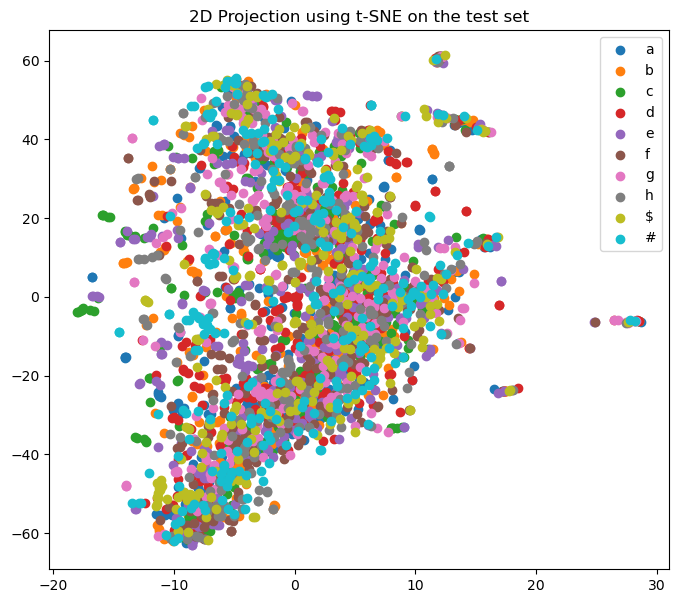

In [39]:
# Visualizing the 2D projection with t-SNE
plt.figure(figsize=(8, 7))
for i in np.unique(t_test):
    plt.scatter(X_test_tsne[t_test == i, 0], X_test_tsne[t_test == i, 1], label=class_names[int(i)])
plt.title('2D Projection using t-SNE on the test set')
plt.legend()
plt.show()

Using PCA

In [40]:
import joblib

# Loading the Trained PCA model
pca_2D = joblib.load('PCA_for_2D.pkl')

In [41]:
# Applying the transformation to the test set using PCA to reduce to 2 dimensions
X_test_pca_2D = pca_2D.transform(X_test_resized)

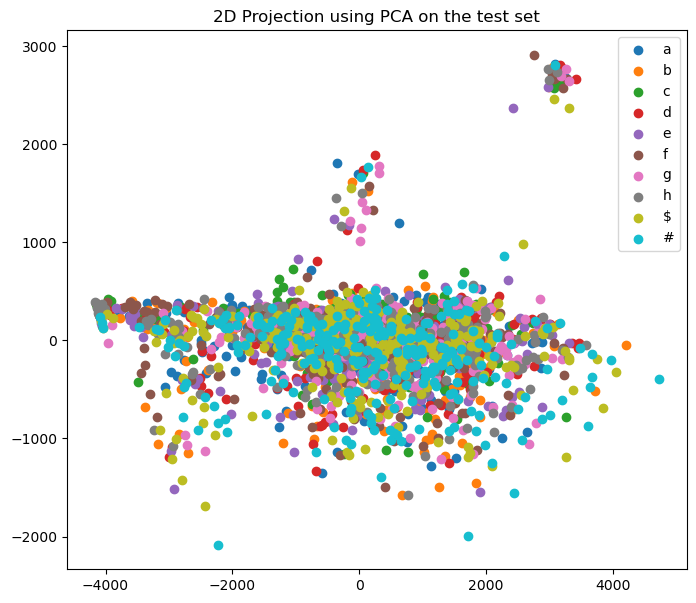

In [42]:
# Visualizing the 2D projection with PCA on the test set
plt.figure(figsize=(8, 7))
for i in np.unique(t_test):
    plt.scatter(X_test_pca_2D[t_test == i, 0], X_test_pca_2D[t_test == i, 1], label=class_names[int(i)])
plt.title('2D Projection using PCA on the test set')
plt.legend()
plt.show()

---

## 4. Manifolds
4. Implement at least 3 manifold learning algorithms for reducing the dimensionality of the feature space. Utilize the new lower-dimensional feature space to build a classifier.
    * Visualize and interpret what the first 2 dimensions in the manifold learning algorithm you train.

#### MDS

In [1]:
import joblib

# Loading the trained MDS models
mds = joblib.load('MDS.pkl')
mds_rf = joblib.load('RF_with_MDS.pkl')
mds_2D = joblib.load('MDS_2D.pkl')

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Applying the MDS transformations on the test set
X_test_mds = mds.fit_transform(X_test_resized)

In [10]:
X_test_mds.shape

(2880, 100)

In [13]:
from sklearn.metrics import classification_report

# Evaluating the performance of Random Forest Classifier with MDS on test set
y_pred_mds = mds_rf.predict(X_test_mds)
print('Performance on the test set with MDS for 100 features:')
print(classification_report(t_test, y_pred_mds))

Performance on the test set with MDS for 100 features:
              precision    recall  f1-score   support

         0.0       0.09      0.11      0.10       274
         1.0       0.11      0.11      0.11       275
         2.0       0.13      0.12      0.12       282
         3.0       0.09      0.12      0.10       295
         4.0       0.10      0.09      0.09       311
         5.0       0.10      0.06      0.08       296
         6.0       0.10      0.16      0.13       291
         7.0       0.09      0.06      0.07       281
         8.0       0.11      0.11      0.11       288
         9.0       0.13      0.10      0.12       287

    accuracy                           0.10      2880
   macro avg       0.11      0.10      0.10      2880
weighted avg       0.11      0.10      0.10      2880



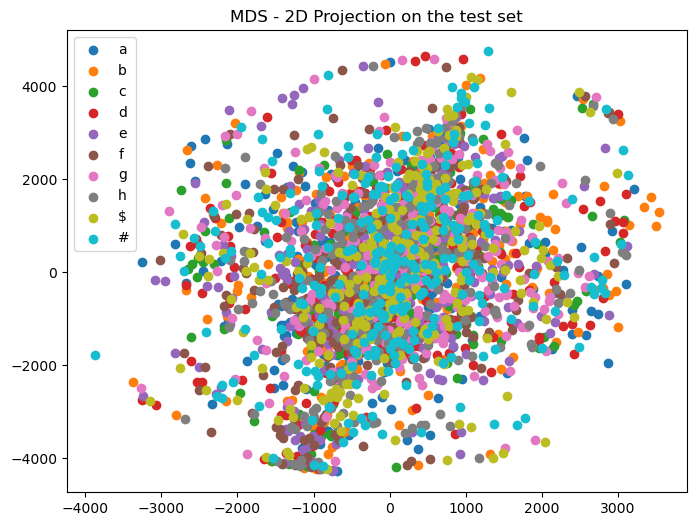

In [7]:
# Visualizing the test set in 2D with MDS
X_test_mds_2D = mds_2D.fit_transform(X_test_resized)

import matplotlib.pyplot as plt

# Visualizing the 2D projection
plt.figure(figsize=(8, 6))
for label in np.unique(t_test):
    plt.scatter(X_test_mds_2D[t_test == label, 0], X_test_mds_2D[t_test == label, 1], label=class_names[int(label)])
plt.title("MDS - 2D Projection on the test set")
plt.legend()
plt.show()

#### ISOMAP

In [14]:
import joblib

# Loading the Trained ISOMAP models
isomap = joblib.load('ISOMAP.pkl')
isomap_rf = joblib.load('RF_with_ISOMAP.pkl')
isomap_2D = joblib.load('ISOMAP_2D.pkl')

In [15]:
# Applying the ISOMAP transformations to the test set
X_test_isomap_transformed = isomap.transform(X_test_resized)

In [16]:
X_test_isomap_transformed.shape

(2880, 100)

In [17]:
# Evaluating the performance f Random Forest Classifier with ISOMAP on test set
print('Performance of Random Forest with ISOMAP on the Test Set:')
t_pred_isomap = isomap_rf.predict(X_test_isomap_transformed)
print(classification_report(t_test, t_pred_isomap))

Performance of Random Forest with ISOMAP on the Test Set:
              precision    recall  f1-score   support

         0.0       0.25      0.26      0.25       274
         1.0       0.23      0.24      0.24       275
         2.0       0.31      0.43      0.36       282
         3.0       0.27      0.23      0.24       295
         4.0       0.31      0.24      0.27       311
         5.0       0.29      0.25      0.27       296
         6.0       0.27      0.36      0.31       291
         7.0       0.25      0.27      0.26       281
         8.0       0.35      0.28      0.31       288
         9.0       0.34      0.29      0.31       287

    accuracy                           0.28      2880
   macro avg       0.29      0.28      0.28      2880
weighted avg       0.29      0.28      0.28      2880



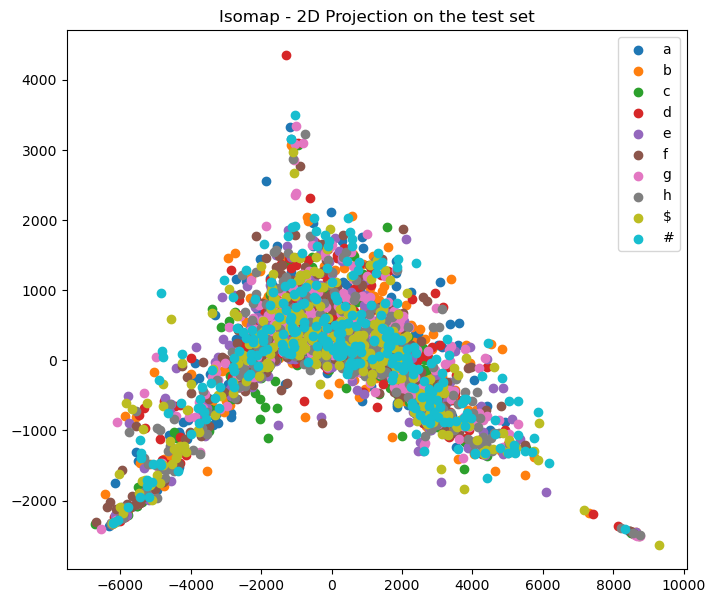

In [18]:
import matplotlib.pyplot as plt

X_isomap_2D = isomap_2D.transform(X_test_resized)

# Visualizing the 2D projection using ISOMAP on the test set
plt.figure(figsize=(8, 7))
for label in np.unique(t_test):
    plt.scatter(X_isomap_2D[t_test == label, 0], X_isomap_2D[t_test == label, 1], label=class_names[int(label)])
plt.title("Isomap - 2D Projection on the test set")
plt.legend()
plt.show()

#### LLE

In [19]:
import joblib

# Loading the Trained LLE models
lle = joblib.load('LLE.pkl')
lle_rf = joblib.load('RF_with_LLE.pkl')
lle_2D = joblib.load('LLE_2D.pkl');

In [20]:
# Applying the LLE transformations to the test set

X_test_lle = lle.transform(X_test_resized)

In [21]:
X_test_lle.shape

(2880, 100)

In [22]:
# Evaluating the performance of Random Forest Classifier with LLE on the test set
y_pred_lle = lle_rf.predict(X_test_lle)

print('Performace of Random Forest Classifier with LLE on the Test Set:')
print(classification_report(t_test, y_pred_lle))

Performace of Random Forest Classifier with LLE on the Test Set:
              precision    recall  f1-score   support

         0.0       0.31      0.39      0.35       274
         1.0       0.30      0.35      0.32       275
         2.0       0.41      0.54      0.46       282
         3.0       0.39      0.31      0.35       295
         4.0       0.42      0.28      0.33       311
         5.0       0.34      0.29      0.31       296
         6.0       0.29      0.42      0.34       291
         7.0       0.38      0.30      0.34       281
         8.0       0.43      0.40      0.41       288
         9.0       0.41      0.35      0.38       287

    accuracy                           0.36      2880
   macro avg       0.37      0.36      0.36      2880
weighted avg       0.37      0.36      0.36      2880



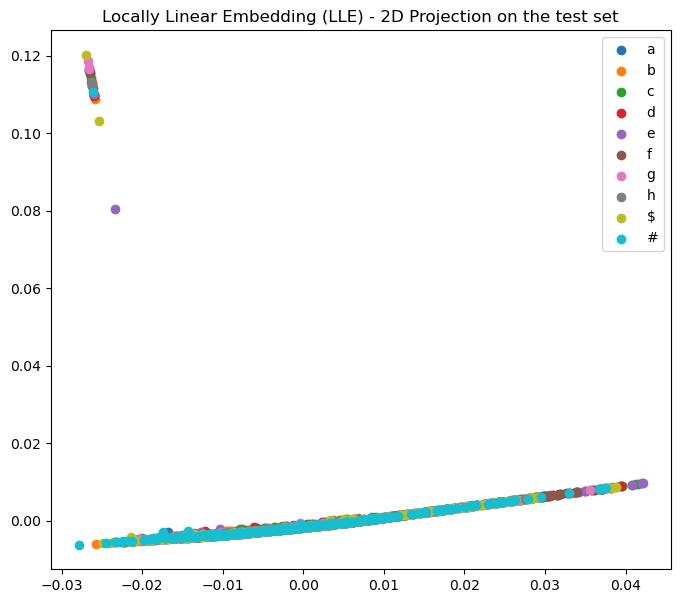

In [24]:
# Visualizing the 2D projection using LLE on the test set

X_lle_2D = lle_2D.transform(X_test_resized)

plt.figure(figsize=(8, 7))
for label in np.unique(t_test):
    plt.scatter(X_lle_2D[t_test == label, 0], X_lle_2D[t_test == label, 1], label=class_names[int(label)])
plt.title("Locally Linear Embedding (LLE) - 2D Projection on the test set")
plt.legend()
plt.show()

---

---